In [50]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [51]:
raw_data = pd.read_csv('PID_omega_data.csv')
om_x = raw_data['/mavros/imu/data/angular_velocity/x']
om_x = om_x.dropna()
om_x = om_x.reset_index()
Time = raw_data['__time']
Time = Time.loc[om_x['index']]

om_y = raw_data['/mavros/imu/data/angular_velocity/y']
om_z = raw_data['/mavros/imu/data/angular_velocity/z']
om_y = om_y.loc[om_x['index']]
om_z = om_z.loc[om_x['index']]

om_x = np.array(om_x)
om_y = np.array(om_y)
om_z = np.array(om_z)
Time = np.array(Time)
Time = Time-Time[0]

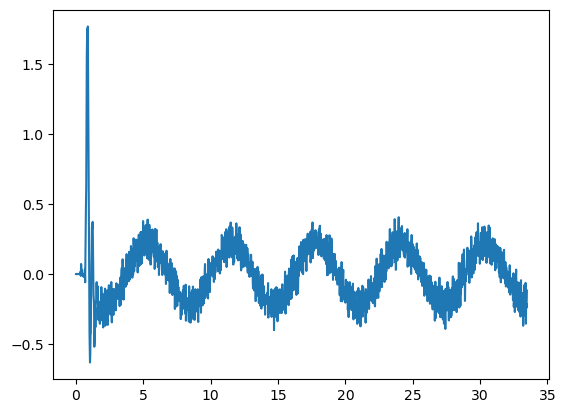

In [52]:
plt.plot(Time, om_x[:,1])

In [53]:
##
# get position and velocity
def differentiator(ra, dt):
    ## euler
    length = ra.shape[0]
    if length < 10:
        ra_dot = (ra[-1,:]-ra[-2,:])/dt
        
    # else:
    #     ra_dot = (ra[-1,:]-ra[-3,:])/(2*dt)
    
    # good vel, accel- a bit bad
    # else:
    #     ra_dot = (ra[-1,:] + ra[-2,:]-ra[-3,:]-ra[-4,:])/(4*dt)
    
    # very good
    # else:
    #     ra_dot = (ra[-1,:] + 2*ra[-2,:] - 2*ra[-4,:] - ra[-5,:])/(8*dt)
    
    # better
    # else:
    #     ra_dot = (ra[-1,:] + 3*ra[-2,:] + 2*ra[-3,:]  - 2*ra[-4,:] - 3*ra[-5,:] - ra[-6,:])/(16*dt)
    
    # velocity starts to get worse, but acceleration is good
    else:
        ra_dot = (ra[-1,:] + 4*ra[-2,:] + 5*ra[-3,:]  - 5*ra[-5,:] - 4*ra[-6,:] - ra[-7,:])/(32*dt)
        
     # else:
#          ra_dot = (ra[-1,:] + 5*ra[-2,:] + 9*ra[-3,:]  + 5*ra[-4,:] - 5*ra[-5,:] - ra[-6,:])/(64*dt)
        
#     else:
#         ra_dot = (ra[-1,:] + 2*ra[-2,:] - 2*ra[-3,:] - ra[-4,:])/(8*dt)

    # preisce on 1,x
    
    # window = 6
    # else:
    #     ra_dot = (ra[-1,:] + 4*ra[-2,:] + 5*ra[-3,:] - 5*ra[-4,:] - 4*ra[-5,:] - ra[-6,:])/(32*dt)
    
    return ra_dot

In [60]:

om_x_filtered = np.copy(om_x)
print(om_x.shape)

for i in range(om_x.shape[0]-1):
    #om_x_filtered[i+1,:],xddot_measured[i+1,:] = differentiator(om_x[:i+2,:],om_x_filtered[:i+2,:],t[i+1,1])
    
    window = 4
    if i > window:
        om_x_filtered[i+1,1] = np.mean(om_x_filtered[i-window:i+2,1],axis = 0)
        # om_x_filtered[i+1,1] = np.mean(om_x_filtered[i-window:i+2,1],axis = 0)
        

    else:
        om_x_filtered[i+1,1] = np.mean(om_x_filtered[:i+2,1],axis = 0)


(1674, 2)


In [61]:
om_x_filtered[:,1]

array([-0.000777  , -0.00114   , -0.001004  , ..., -0.19767962,
       -0.19159093, -0.17952561])

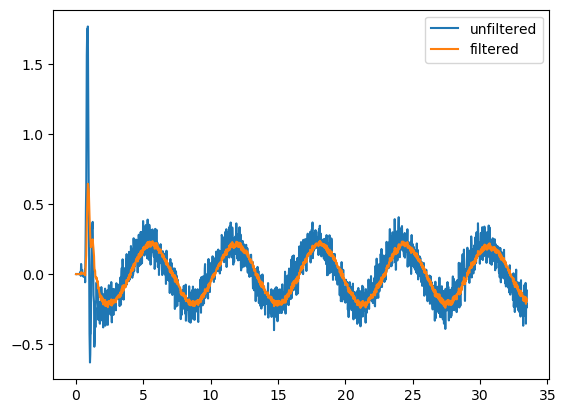

In [62]:
plt.plot(Time, om_x[:,1],label = 'unfiltered')
plt.plot(Time, om_x_filtered[:,1], label = 'filtered')
plt.legend()